<a href="https://colab.research.google.com/github/temoortayyab/Mpox_Prediction/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Data Cleaning

### Data Analysis Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.interactive(False)

### Preprocessing libraries

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

### Machine Learning Algorithms

In [3]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

### Metric Evaluation Libraries

In [4]:

from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

 ### Set Working directory/Uploading Data

In [7]:

from google.colab import files
uploaded = files.upload()

import warnings
warnings.filterwarnings('ignore')

Saving DATA.csv to DATA (1).csv


In [11]:
data = pd.read_csv('DATA.csv')

## Data Description and Data Cleaning

In [14]:
#Shape
print(data.shape)

(25000, 11)


In [15]:
#Head
print(data.head(20))

   Patient_ID       Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0          P0                    NaN        False         True           True   
1          P1                  Fever         True        False           True   
2          P2                  Fever        False         True           True   
3          P3                    NaN         True        False          False   
4          P4    Swollen Lymph Nodes         True         True           True   
5          P5    Swollen Lymph Nodes        False         True          False   
6          P6                  Fever        False         True          False   
7          P7                  Fever         True         True          False   
8          P8  Muscle Aches and Pain        False         True           True   
9          P9                  Fever        False        False           True   
10        P10  Muscle Aches and Pain        False         True           True   
11        P11    Swollen Lym

In [16]:
# descriptions
print(data.describe())

       Patient_ID Systemic Illness Rectal Pain Sore Throat Penile Oedema  \
count       25000            18784       25000       25000         25000   
unique      25000                3           2           2             2   
top            P0            Fever       False        True          True   
freq            1             6382       12655       12554         12612   

       Oral Lesions Solitary Lesion Swollen Tonsils HIV Infection  \
count         25000           25000           25000         25000   
unique            2               2               2             2   
top           False            True            True          True   
freq          12514           12527           12533         12584   

       Sexually Transmitted Infection MonkeyPox  
count                           25000     25000  
unique                              2         2  
top                             False  Positive  
freq                            12554     15909  


In [17]:
# class distribution
print(data.groupby('MonkeyPox').size())

MonkeyPox
Negative     9091
Positive    15909
dtype: int64


There is class imbalance present. Most individuals in dataset are mpox positive

### Checking and handling missing data

In [18]:

print(data.isnull().sum())


Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64


"None" for systemic illness is being interpreted as missing, no missing data otherwise

In [20]:
#Change "None" to "No"
data['Systemic Illness'] = data['Systemic Illness'].fillna('No')

In [21]:
print(data.isnull().sum())
#No missing data now

Patient_ID                        0
Systemic Illness                  0
Rectal Pain                       0
Sore Throat                       0
Penile Oedema                     0
Oral Lesions                      0
Solitary Lesion                   0
Swollen Tonsils                   0
HIV Infection                     0
Sexually Transmitted Infection    0
MonkeyPox                         0
dtype: int64


### Removing unnecessary variables

In [22]:
#removing patient_ID, not needed
data = data.drop(columns=["Patient_ID"], axis=1)

### One-hot encoding

In [23]:
#one-hot encoding for systematic illness variable
data = pd.get_dummies(data,columns=['Systemic Illness'])
print(data.head())

   Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  Solitary Lesion  \
0        False         True           True          True            False   
1         True        False           True          True            False   
2        False         True           True         False            False   
3         True        False          False         False             True   
4         True         True           True         False            False   

   Swollen Tonsils  HIV Infection  Sexually Transmitted Infection MonkeyPox  \
0             True          False                           False  Negative   
1            False           True                           False  Positive   
2            False           True                           False  Positive   
3             True           True                           False  Positive   
4             True           True                           False  Positive   

   Systemic Illness_Fever  Systemic Illness_Muscle Aches and P

In [24]:
#expanding display
pd.set_option('display.max_columns', None)

### Data Type Conversion

In [25]:
#recoding T/F and Positive/Negative to 1s and 0s
data = data.replace(["Positive", "Negative", True, False], [1,0,1,0])

In [26]:
#removing the Systematic Illness_No variable as it would be redundant with the other categories, causing multicollinearity
data = data.drop(columns=["Systemic Illness_No"], axis=1)

## Exploratory Data Analysis

In [27]:
#Confirming class imbalance through plot
palette = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(y='MonkeyPox', data=data, palette=palette, ax=ax)
ax.set_title('Distribution of Monkey Pox', fontsize=15);


### Univariate plots

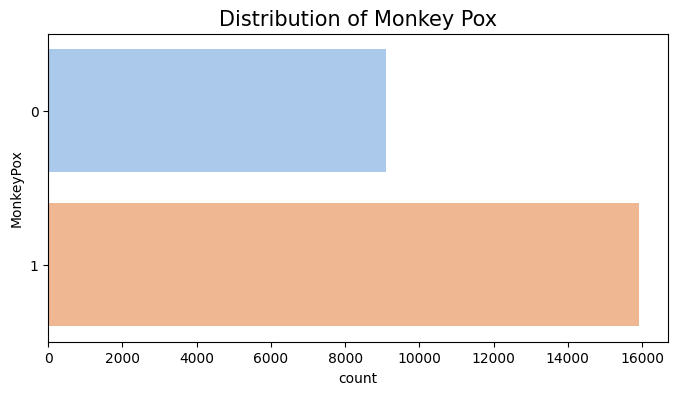

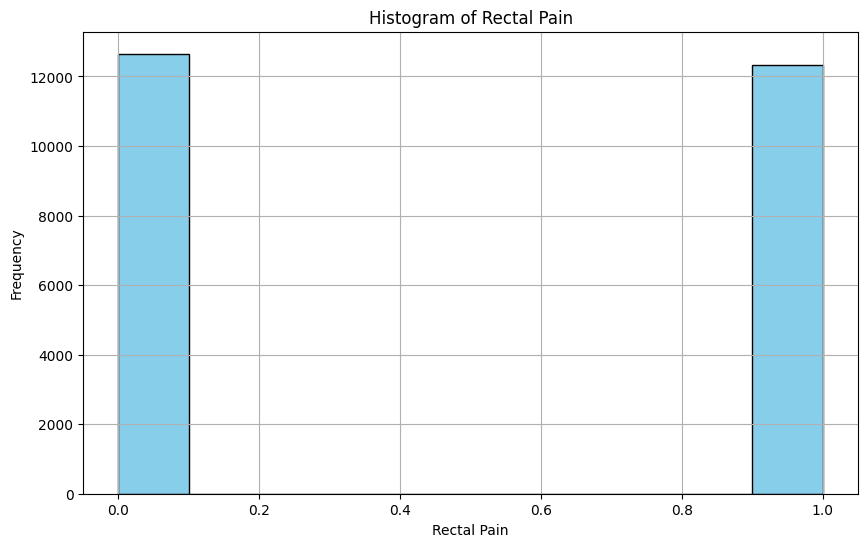

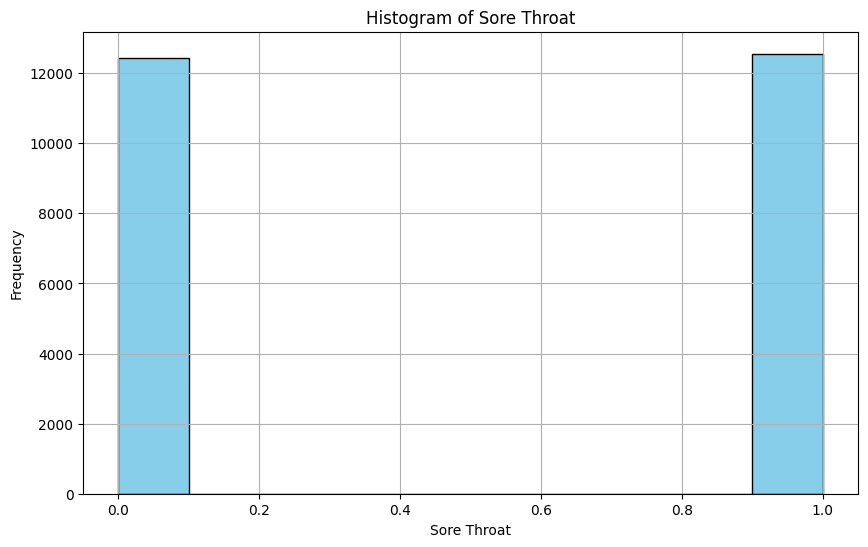

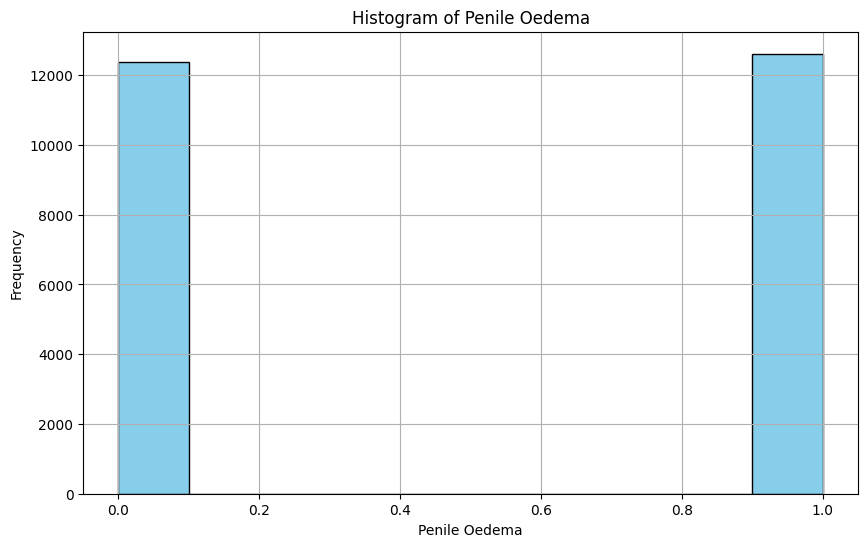

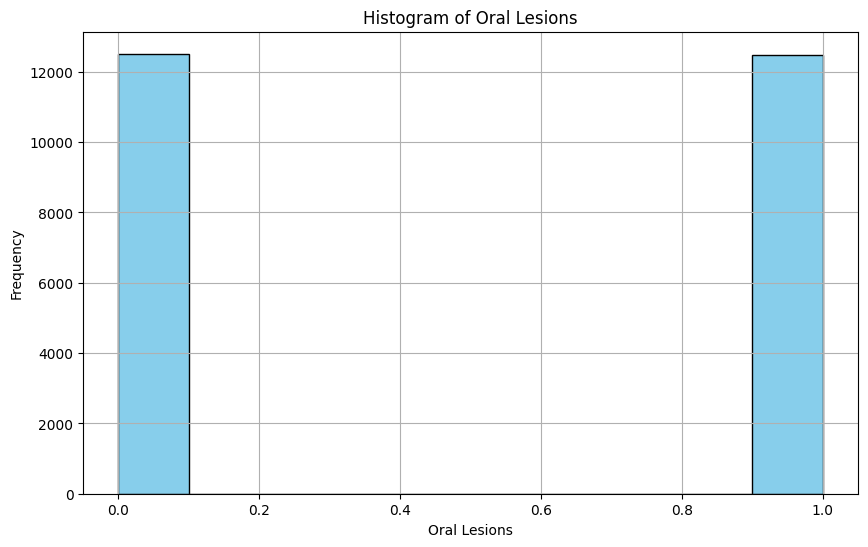

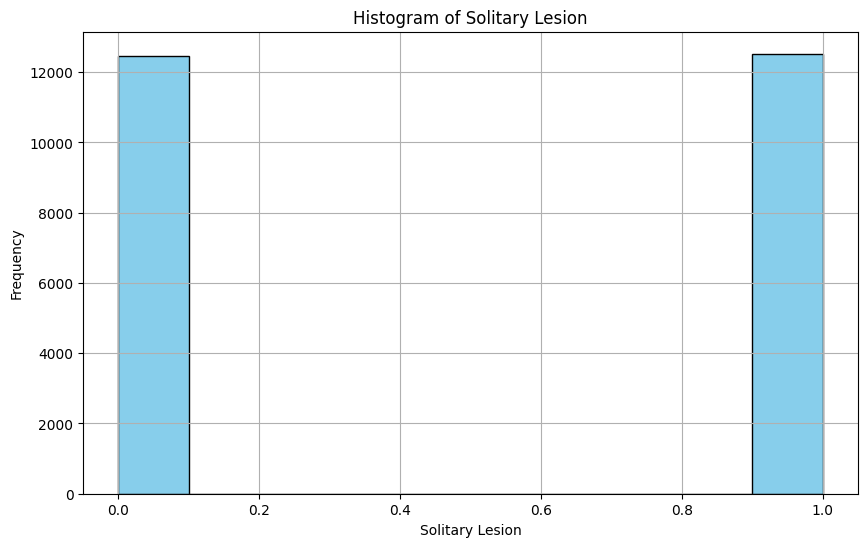

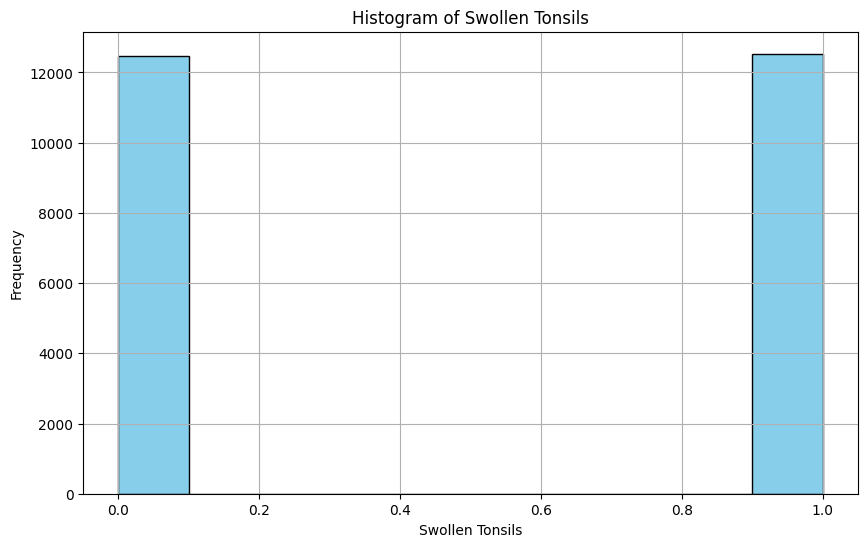

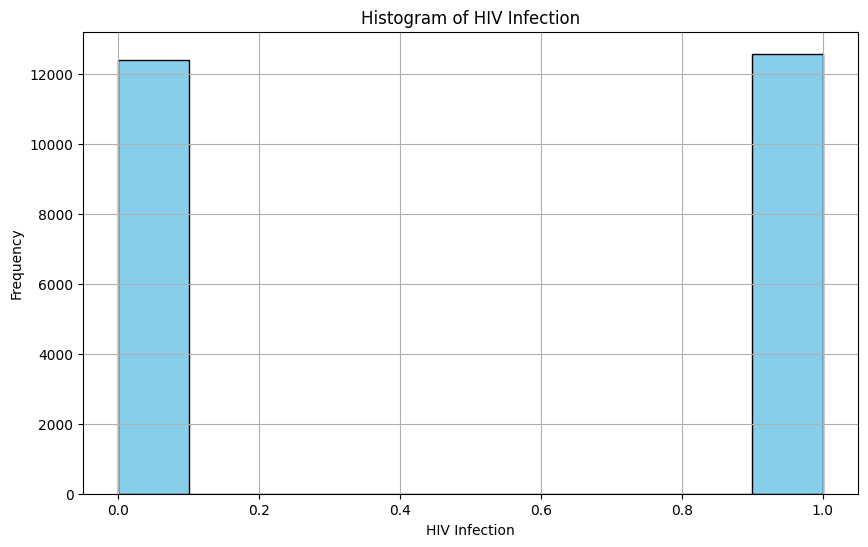

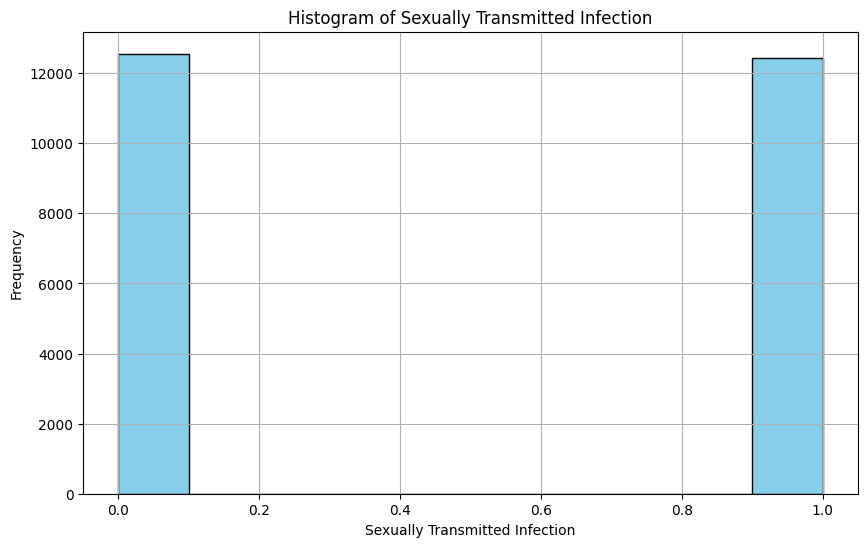

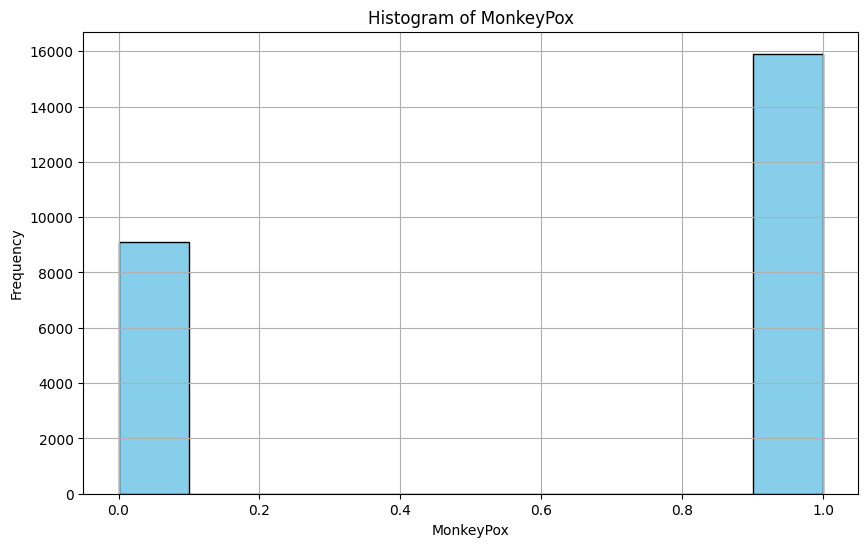

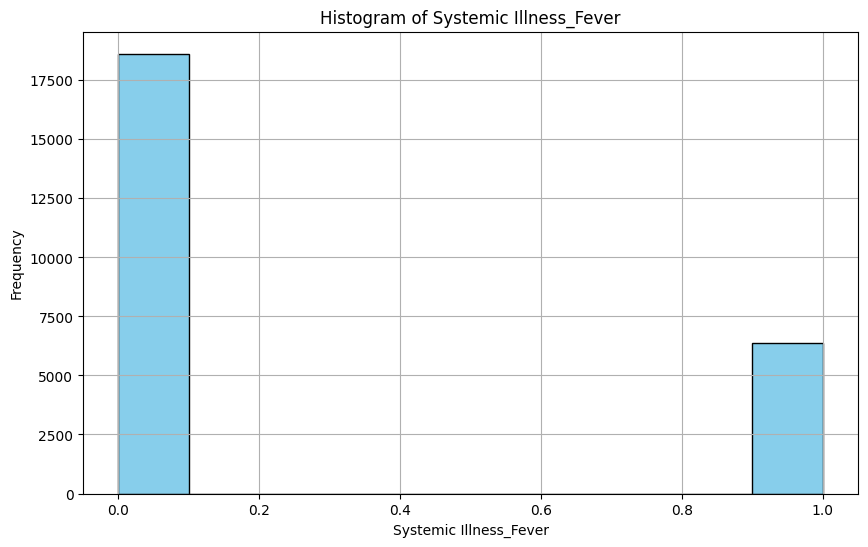

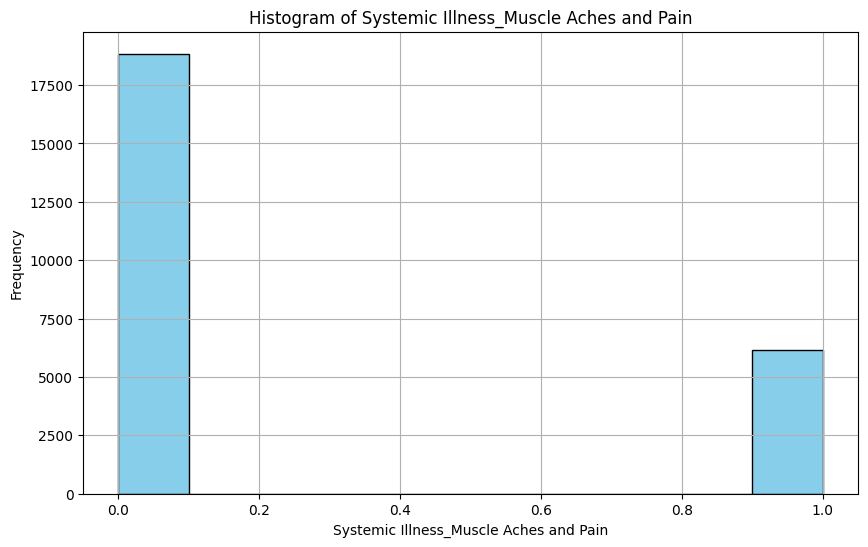

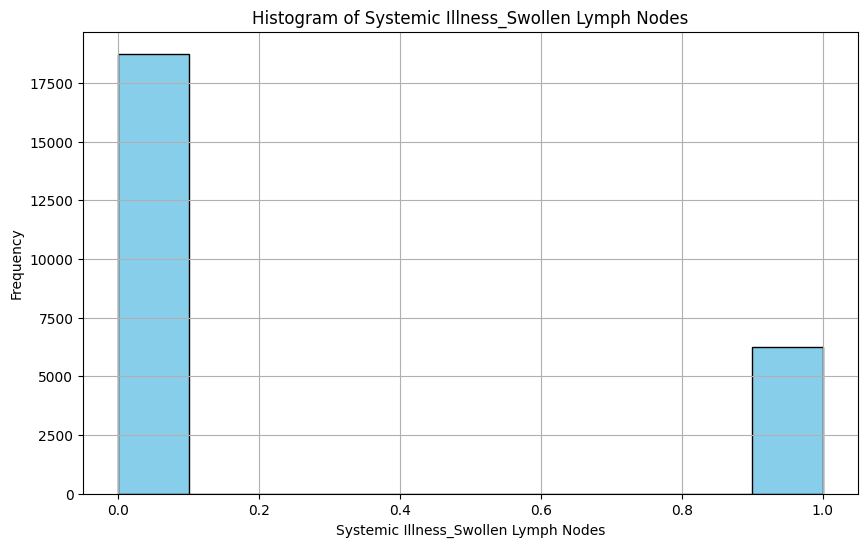

In [28]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Create a new figure for each histogram
    plt.figure(figsize=(10, 6))

    # Plot histogram
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')

    # Add titles and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Display the plot
    plt.show(block=True)

### Checking for correlation

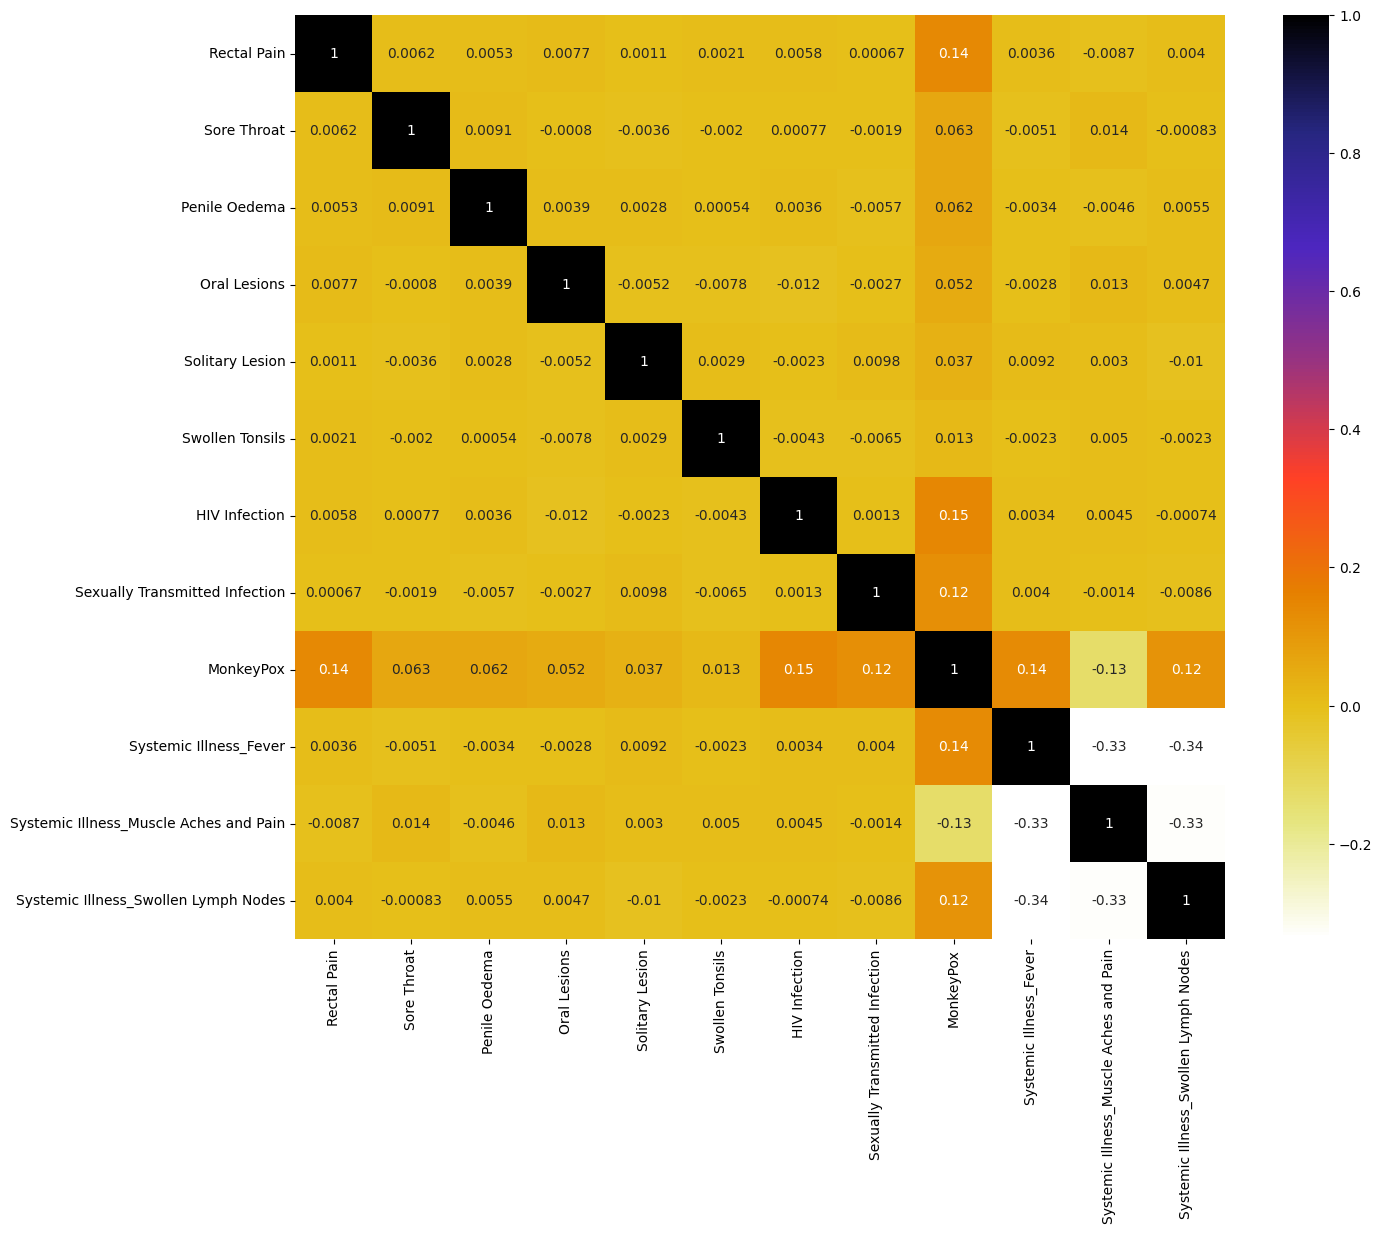

In [29]:
#Correlation Matrix
from matplotlib.pyplot import figure
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), cmap=plt.cm.CMRmap_r, annot = True)
plt.show(block=True)

No features/variables are significantly correlated with each other as displayed above

## Data Preparation for Modeling

In [30]:
#Splitting Data into Training and Testing
X_train=data.drop(columns=["MonkeyPox"])
y_train=data["MonkeyPox"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

#Identifying numeric and categorical columns
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Train dataset shape: (20000, 11)
Test dataset shape (20000,)
Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'Systemic Illness_Fever',
       'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_Swollen Lymph Nodes'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')
Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'Systemic Illness_Fever',
       'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_Swollen Lymph Nodes'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index([], dtype='object'))])

### Model Preparation

In [31]:

def prepare_model(algorithm):
    model = Pipeline(steps=[
        ('processing', processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model


def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12, 8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show(block=True)

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');

def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show(block=True)

## Model Training

In [32]:

algorithms = [('bagging classifier', BaggingClassifier()),
              ('KNN classifier', KNeighborsClassifier()),
              ('Random Forest calssifier', RandomForestClassifier()),
              ('Adaboost classifier', AdaBoostClassifier()),
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier()),
              ('DecisionTree classifier', DecisionTreeClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

## Model Evaluation

In [35]:

for key in model_and_score:
    print(key+" = "+model_and_score[key])

bagging classifier = 70.46%
KNN classifier = 66.63%
Random Forest calssifier = 70.595%
Adaboost classifier = 65.93%
Gradientboot classifier = 67.955%
MLP = 65.55%
DecisionTree classifier = 70.595%


### Confusion Matrices

bagging classifier


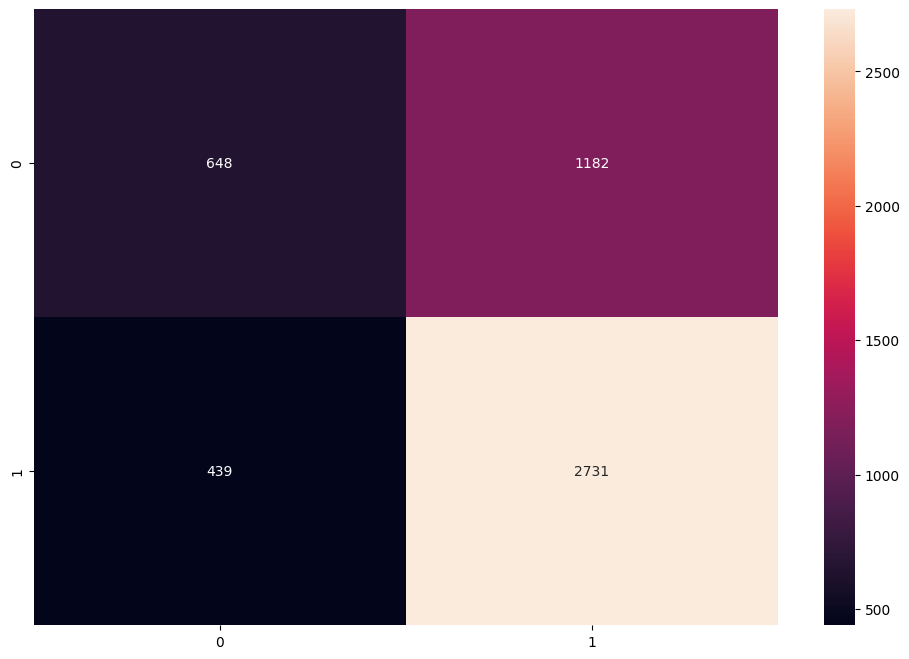

KNN classifier


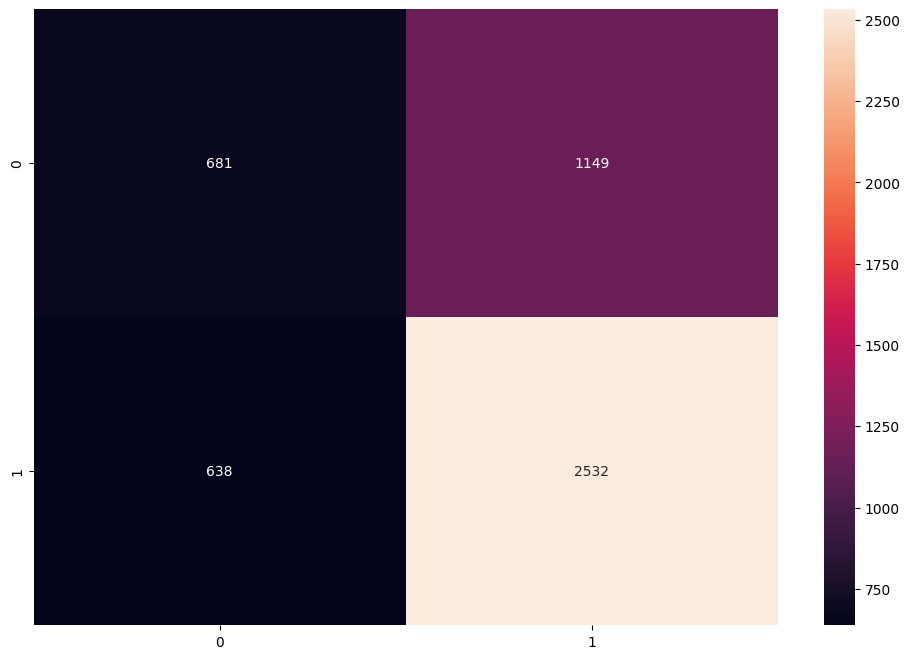

Random Forest calssifier


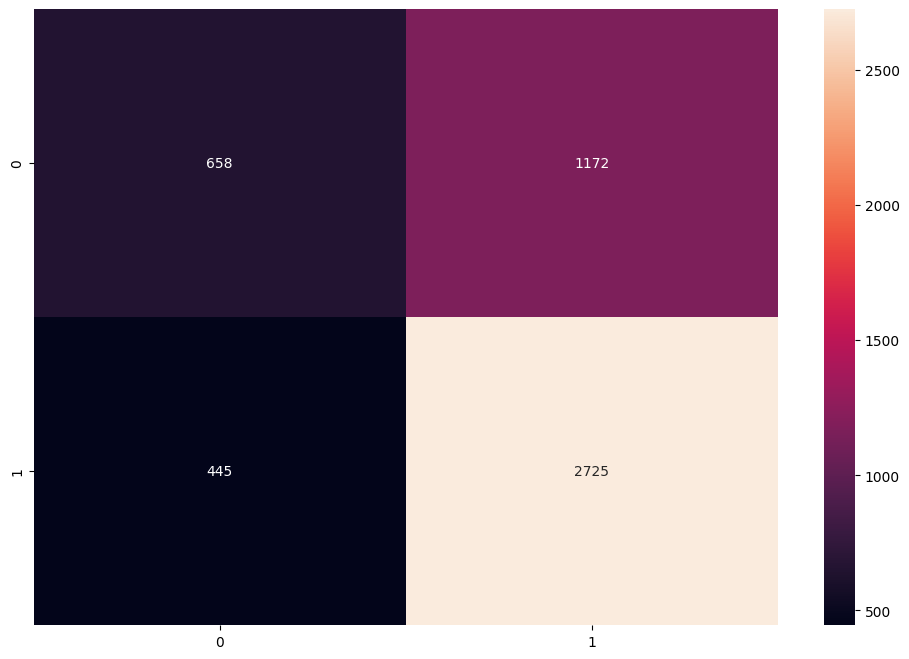

Adaboost classifier


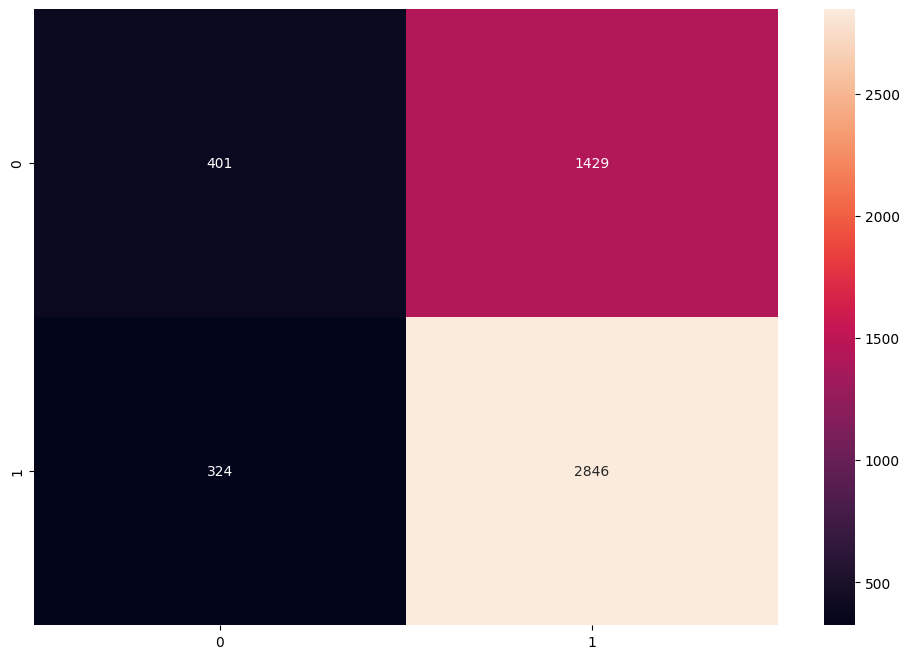

Gradientboot classifier


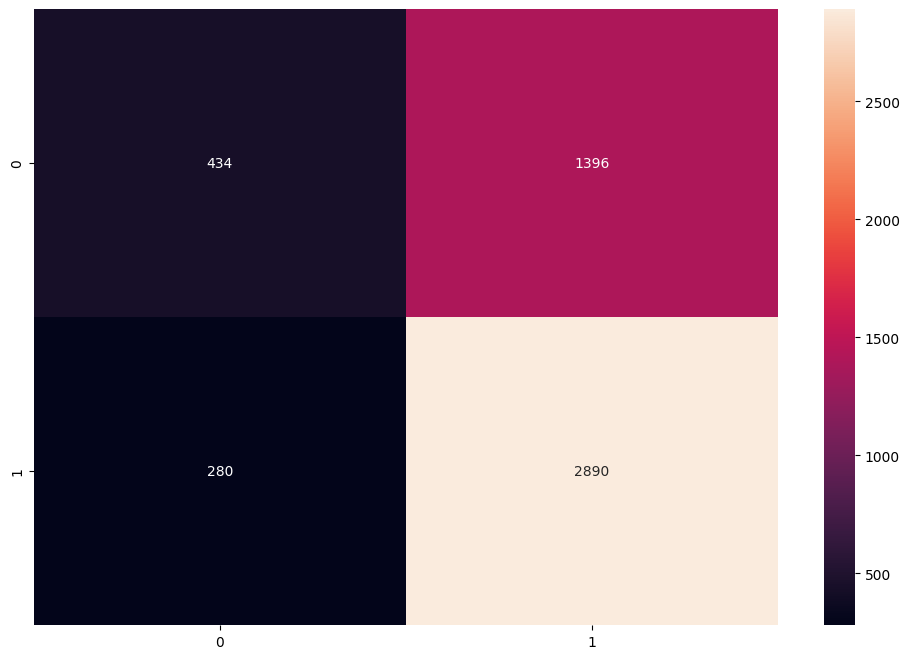

MLP


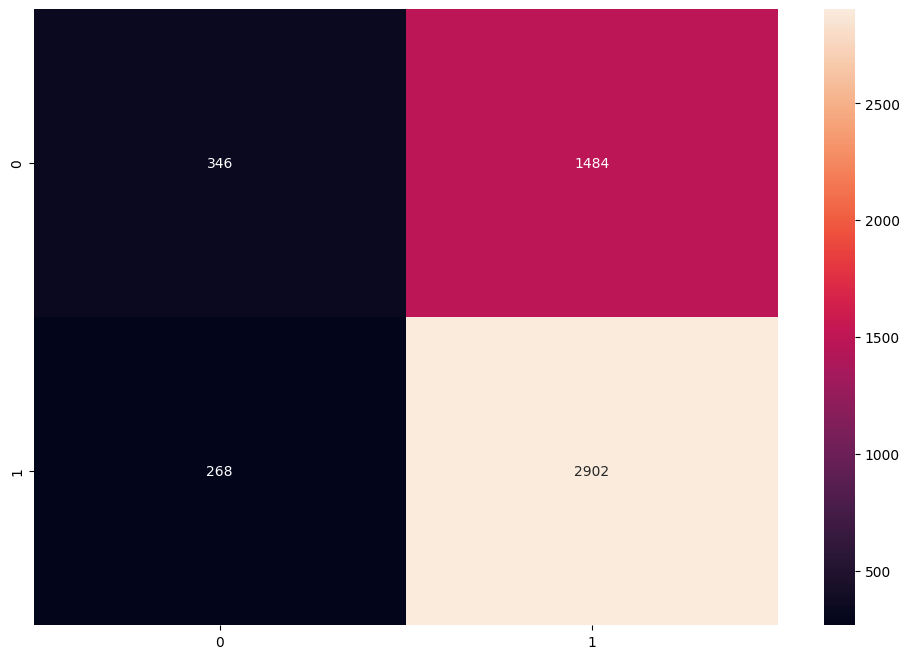

DecisionTree classifier


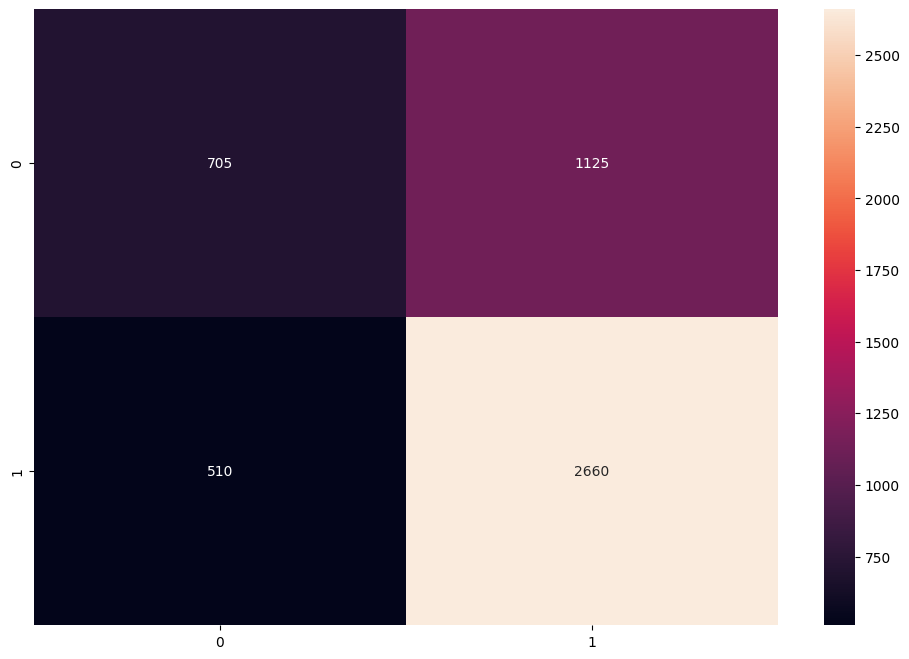

In [36]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

Based on the confusion matrices above, True Negative rate is quite high and True Positive rate is quite low for all algorithms. This indicates that the models may be effective at confirming those without mpox, but are not as effective at confirming those with mpox

### ROC Curves

bagging classifier


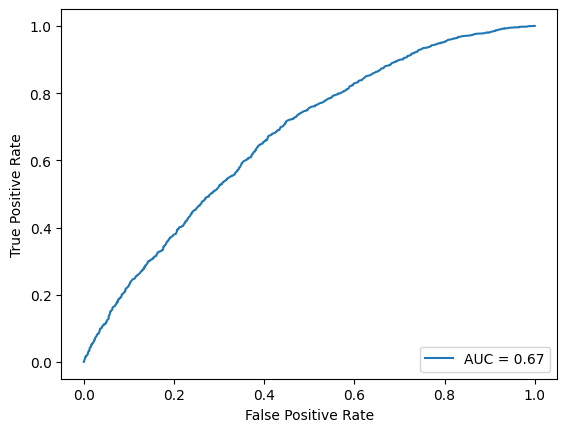

KNN classifier


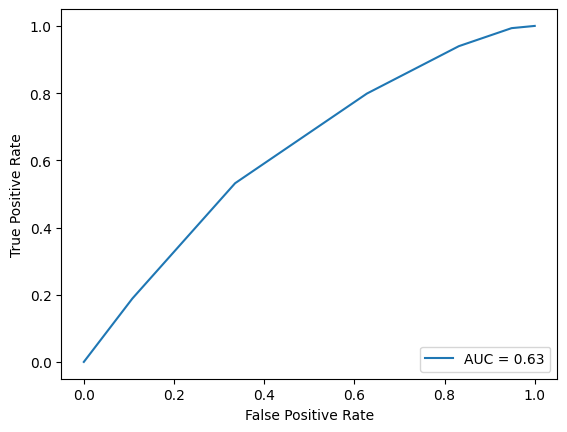

Random Forest calssifier


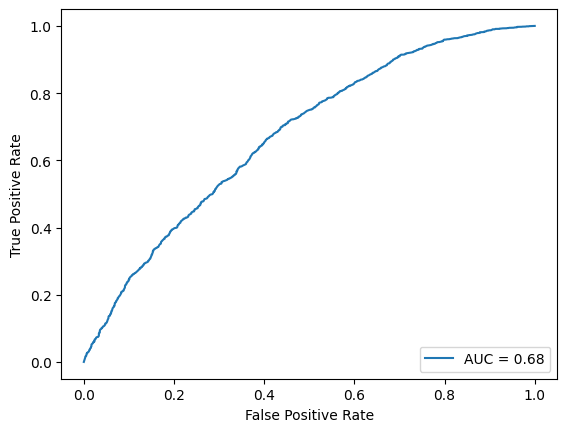

Adaboost classifier


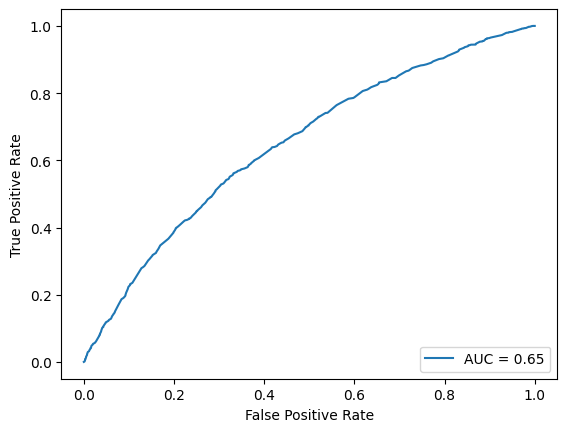

Gradientboot classifier


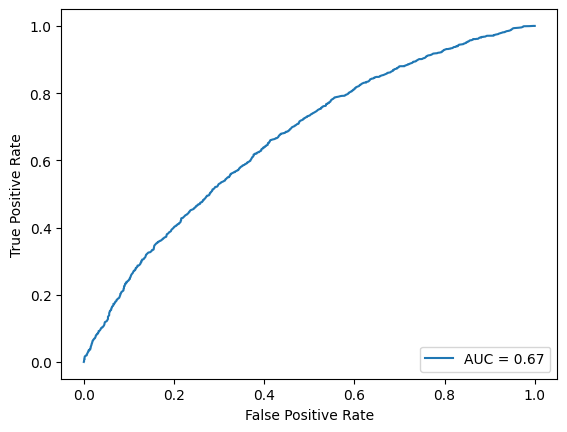

MLP


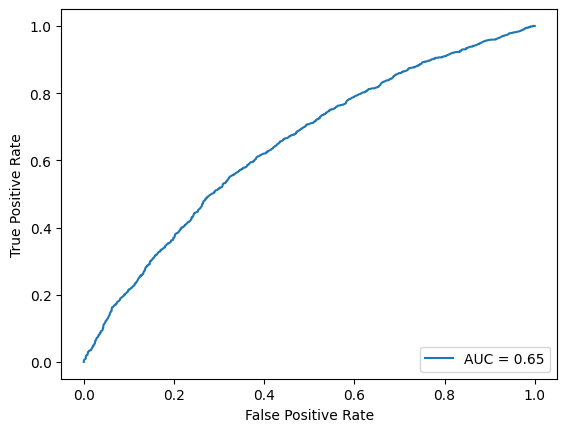

DecisionTree classifier


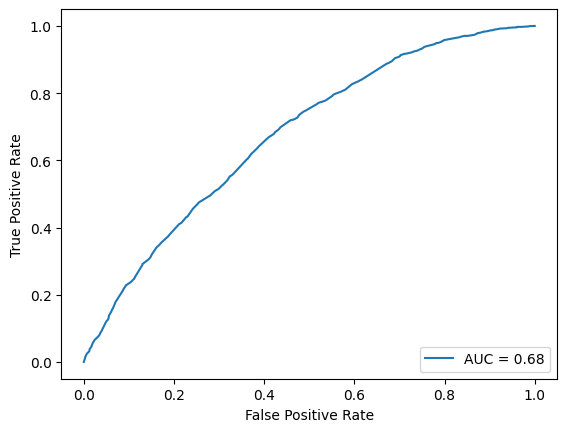

In [34]:
for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

## Conclusions

The machine learning algorithms ran consisted of: Bagging classifier, KNN classifier, Random Forest classifier, Adaboost classifier, Gradientboost classifier, MLP classifier, and DecisionTree classifier. Of these, Random Forest and Decision Tree algorithms were the most accurate models for prediction mpox (i.e. AUC values of 0.68), although the other models evaluation metrics were very similar. AUC values of 0.68 indicate a moderate performance; the model has some ability to differentiate between the positive and negative classes, but it's not highly effective.

Furthermore, and as previously described, the algorithms may not be very effective at detecting true cases. Given the ongoing mpox outbreak, it would be ideal to ensure as many true cases as possible are correctly identified in order to control the outbreak and provide appropriate care. For some next steps in regards to model improvement, feature detection can be conducted to determine the most important variables for predicting mpox cases. Adding or refining important features following this would also be helpful, although more research and data will be needed for this.